In [6]:
# check

import tensorflow as tf 
print(tf. __version__) 

2.6.0


In [5]:
pip install tensorflow -i https://pypi.douban.com/simple

  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=a469eb7912b07f018b67bd1ae7e0b28cc29c04b71e1000c6b0e42bb0a0ab61ce
  Stored in directory: c:\users\jz\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-win_amd64.whl size=33699 sha256=6536963b9e2e82fa6711447b0e9a59c9487f1510ae265301a178c03fe203376e
  Stored in directory: c:\users\jz\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30710 sha256=3ab7b1f0ae67dc8d14dfbdb6a2cdf0ab01626208de5e7c48a1f0b3b6aae407e1
  Stored in directory: c:\users\jz\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built termcolor wrapt clang
 

### P359 - P422

# The perceptron

In [7]:
### by lineat threshold units (LTU)

In [8]:
### Perceptron convergence theroem

In [9]:
### change the step function with other ones 

# sigmiod function: makes it non-zero derivative 

# hyperbolic tangent: starting with value around 0 

# ReLu

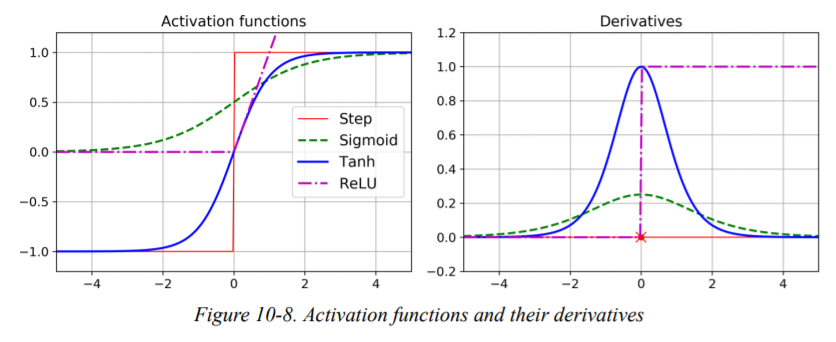

In [10]:
### the training function 

# normally use mse 

# too many outliers: use mean absolute error 

# or use Huber loss: the combination of two 

### Classification MLPs

In [11]:
# use softmax when multiclass classification cases 

# Keras

In [12]:
### Multibackend keras & tf.keras

In [4]:
# test 

from tensorflow import keras 

keras.__version__

'2.6.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# convert the features to floats 

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# look at first image in train set 

class_names[y_train[0]]

'Coat'

In [9]:
### creating the model using the Sequential API 

model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [10]:
# or using a list 

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

### Lots of stuff: look at the origin book 

### Saving and Restotring a Model 

In [11]:
# model.save("my_keras_model.h5")

In [12]:
# model = keras.models.load_model("my_keras_model.h5")

In [13]:
### to save the model in the middle of training 

### callbacks

#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
#history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

### with validation: save_best_only = True 

# or with earlystopping 
#early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [14]:
import numpy as np 
import tensorflow as tf 

np.random.seed(42)
tf.random.set_seed(42)

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [17]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [16]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4177
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - val_loss: 0.4139
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4341 - val_loss: 0.4064
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4268 - val_loss: 0.4054
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4209 - val_loss: 0.3944
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3992
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3923
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4069 - val_loss: 0.3835
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4032 - val_loss: 0.3893
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3979


### Use TensorBoard for Visualization 

In [17]:
# the binary log files called event files 

In [19]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [20]:
# the tensorboard() callback() 

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) 
history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data = (X_valid, y_valid), 
                   callbacks = [tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4032 - val_loss: 0.3872
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4000 - val_loss: 0.4105
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3972 - val_loss: 0.4044
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - val_loss: 0.4014
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3924 - val_loss: 0.3898
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3899 - val_loss: 0.4037
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3882 - val_loss: 0.3941
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3863 - val_loss: 0.3779
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3844 - val_loss: 0.3880
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3827 - val_loss: 0.3955

In [24]:
### look at the tensorboard 

# from here
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

# or from the website 


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
# tf.summary function:

# to log the scalers, histograms...

### Fine-Tuning Neural Network Hyperparams

In [18]:
### build a function that will build and compile a Keras model, given a set of hyperparameters

In [22]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape = [8]):
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate) 
    model.compile(loss='mse', optimizer=optimizer)
    return model 

In [23]:
### now, build a Keras Regressor 

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [25]:
### then, we can use this model 

keras_reg.fit(X_train, y_train, epochs=10, 
             validation_data = (X_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test) 
#y_pred = keras_reg.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1415 - val_loss: 1.9696
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5958 - val_loss: 3.3564
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5666 - val_loss: 2.3866
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4776 - val_loss: 0.9450
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4452 - val_loss: 0.8425
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4246 - val_loss: 0.4375
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4114 - val_loss: 0.4463
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4032 - val_loss: 0.4134
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3973 - val_loss: 0.3955
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3829


NameError: name 'X_new' is not defined

In [26]:
### use random search for hyperparameters 

from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV 

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10, 
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 4.4383 - val_loss: 2.1329
Epoch 2/10
242/242 [==============================] - 0s 1ms/step - loss: 1.3994 - val_loss: 1.0126
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.8385 - val_loss: 0.8192
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7129 - val_loss: 0.7342
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6745 - val_loss: 0.6994
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6520 - val_loss: 0.9233
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6393 - val_loss: 0.8472
Epoch 8/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6273 - val_loss: 0.8542
Epoch 9/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6435
Epoch 10/10
121/121 [==============================] - 0s 903us/step - loss: 0.6013
Epoch 1/10
242/2

Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6225 - val_loss: 1.9242
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5993 - val_loss: 1.3781
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5785 - val_loss: 1.0414
Epoch 10/10
121/121 [==============================] - 0s 976us/step - loss: 0.5604
Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 2.7623 - val_loss: 2.2906
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 1.2065 - val_loss: 1.3031
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.8920 - val_loss: 0.8226
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7841 - val_loss: 0.7198
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7288 - val_loss: 0.6747
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6913 - val_loss: 0.6366
Epoch 7/10
242/2

242/242 [==============================] - 0s 891us/step - loss: 0.9127 - val_loss: 44.5257
Epoch 3/10
242/242 [==============================] - 0s 878us/step - loss: 0.8678 - val_loss: 74.0065
Epoch 4/10
242/242 [==============================] - 0s 899us/step - loss: 0.7329 - val_loss: 64.2594
Epoch 5/10
242/242 [==============================] - 0s 883us/step - loss: 0.8161 - val_loss: 42.2449
Epoch 6/10
242/242 [==============================] - 0s 835us/step - loss: 0.8248 - val_loss: 10.1183
Epoch 7/10
242/242 [==============================] - 0s 904us/step - loss: 0.5898 - val_loss: 0.3928
Epoch 8/10
242/242 [==============================] - 0s 901us/step - loss: 0.4147 - val_loss: 0.3777
Epoch 9/10
242/242 [==============================] - 0s 923us/step - loss: 0.4065 - val_loss: 0.3833
Epoch 10/10
121/121 [==============================] - 0s 569us/step - loss: 0.4173
Epoch 1/10
242/242 [==============================] - 0s 1ms/step - loss: 0.7386 - val_loss: 1.4846
Epoch 

242/242 [==============================] - 0s 907us/step - loss: 0.4279 - val_loss: 0.4528
Epoch 8/10
242/242 [==============================] - 0s 826us/step - loss: 0.4213 - val_loss: 0.5167
Epoch 9/10
242/242 [==============================] - 0s 849us/step - loss: 0.4160 - val_loss: 0.6836
Epoch 10/10
121/121 [==============================] - 0s 544us/step - loss: 0.4196
Epoch 1/10
242/242 [==============================] - 0s 1ms/step - loss: 1.7921 - val_loss: 0.8057
Epoch 2/10
242/242 [==============================] - 0s 896us/step - loss: 0.6404 - val_loss: 0.8072
Epoch 3/10
242/242 [==============================] - 0s 857us/step - loss: 0.5658 - val_loss: 0.5171
Epoch 4/10
242/242 [==============================] - 0s 874us/step - loss: 0.5128 - val_loss: 0.5113
Epoch 5/10
242/242 [==============================] - 0s 902us/step - loss: 0.4764 - val_loss: 1.1425
Epoch 6/10
242/242 [==============================] - 0s 876us/step - loss: 0.4558 - val_loss: 1.1233
Epoch 7/10


363/363 [==============================] - 1s 1ms/step - loss: 1.3719 - val_loss: 3.4330
Epoch 2/10
363/363 [==============================] - 0s 847us/step - loss: 0.6261 - val_loss: 0.6182
Epoch 3/10
363/363 [==============================] - 0s 805us/step - loss: 0.5222 - val_loss: 0.4731
Epoch 4/10
363/363 [==============================] - 0s 823us/step - loss: 0.4736 - val_loss: 0.4608
Epoch 5/10
363/363 [==============================] - 0s 823us/step - loss: 0.4463 - val_loss: 0.4353
Epoch 6/10
363/363 [==============================] - 0s 808us/step - loss: 0.4252 - val_loss: 0.4893
Epoch 7/10
363/363 [==============================] - 0s 805us/step - loss: 0.4128 - val_loss: 0.4294
Epoch 8/10
363/363 [==============================] - 0s 819us/step - loss: 0.4016 - val_loss: 0.3853
Epoch 9/10
363/363 [==============================] - 0s 812us/step - loss: 0.3921 - val_loss: 0.4259
Epoch 10/10
363/363 [==============================] - 0s 807us/step - loss: 0.3851 - val_loss:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000294A87C9DF0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000294A8AD95E0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [27]:
### look at the param 

rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [28]:
rnd_search_cv.best_score_

-0.397792249917984

In [30]:
model = rnd_search_cv.best_estimator_.model 

In [31]:
### learning rate, batch size, and other hyperparams 

# learning rate: sometimes the lr_best = lr_max/2
# so you can increase the lr to find the lr_max

